<a id='weakscaling'></a>
# Weak Scaling 

The following code measures the execution times of a certain program with an increasing number of threads. As we increase the thread number we also increase the problem size. This is called weak scaling.

In the first half we make our calculations based on the program, which measures execution time on the algorithm only. In the second half we make the exact same calculations, but we measure the execution time of the entire program. 

## Which program do you want to test ?

In the following code line, replace the last word `matrixmultiplication` with the program name you want to test. Then run all the code lines (and be very patient).  You may want to adjust the values for problemsize, depending on what program you are testing. 

I give you quick summary of all the programs you can choose from. In the table below you can also see what the problem size is and what the default value for problem size is set to. Note that with all the programs you have the option to give just one value for problem size. In the program fibonacci for example you can either pass two values for the start and end of the interval; or you just pass one value, in which case the start will be set to 0. In the mandelbrot program the width of the picture will be set to the height if you pass only one value. The same is the case for the grid dimension of the jacobi matrix. 

| program | problemsize | default |
| :- | :- | :- |
| pi | number of intervals | 150'000'000 |
| jacobi | grid dimension | 100, 100 |
| fibonacci | n'th element of the fibonacci sequence | 40 |
| findprime | interval during which prime numbers are searched | 0, 1'000'000 |
| mandelbrot | dimensions of the mandelbrot picture | 1080, 1920 |
| quicksort | length of list to be sorted | 1'000'000 |
| mergesort | length of list to be sorted | 1'000'000 |
| bubblesort | length of list to be sorted | 10'000 |
| selectionsort | length of list to be sorted | 10'000 |
| matrixmultiplication | dimension of the matrices | 500 |

You can also test your own program. Check the readme file to find out how to do this.

In [1]:
%cd ~/performance/programs/matrixmultiplication

/home/jovyan/performance/programs/matrixmultiplication


In [2]:
import numpy as np

#start of parameters you might want to adjust (for a linear increase in problemsize)
y = 0
angle = 10
threads = np.array([1,2,4,8,16,32,64])
#end of parameters you might want to adjust

problemsize = y+angle*threads
#problemsize = np.array([10,20,40,80,160,320,640])  #if you want to set manual problem sizes for each thread

print("We want to run the code with:")
print(str(threads[0])+" thread and problem size " + str(problemsize[0]))
for i in range(len(threads)-1):
    print(str(threads[i+1])+" threads and problem size " + str(problemsize[i+1]))

We want to run the code with:
1 thread and problem size 10
2 threads and problem size 20
4 threads and problem size 40
8 threads and problem size 80
16 threads and problem size 160
32 threads and problem size 320
64 threads and problem size 640


You have to manually adjust the time measurements in the following code cell so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number, the second argument is the number of repeats, and the third argument is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` suppresses the terminal output.

In [3]:
time_parallel = []
time_serial = []

# measure serial execution time
! ./timing.o 1 5 10 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 20 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 40 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 80 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 160 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 320 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 1 5 640 >/dev/null
time_serial.append(np.genfromtxt('/tmp/time.txt'))

# measure parallel execution time
! ./timing.o 1 5 10 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 2 5 20 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 4 5 40 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 8 5 80 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 16 5 160 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 32 5 320 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))
! ./timing.o 64 5 640 >/dev/null
time_parallel.append(np.genfromtxt('/tmp/time.txt'))

# calculate speedup and efficiency
speedup = np.array(time_serial)/np.array(time_parallel)
efficiency = speedup/threads

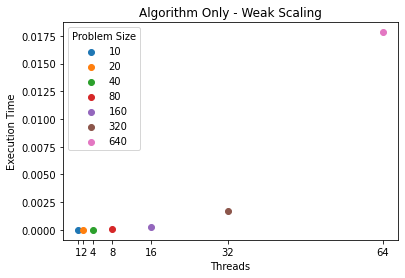

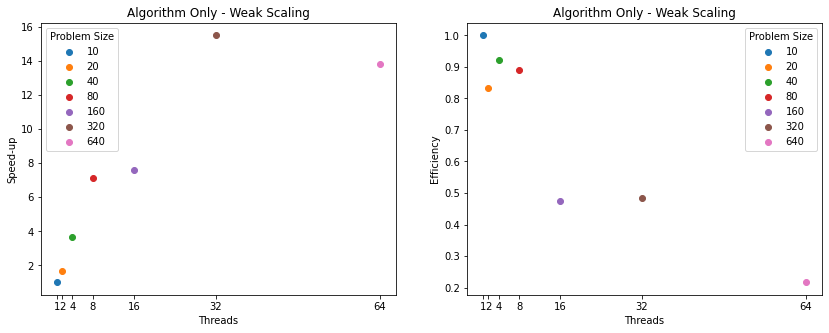

In [4]:
# plot results

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(figsize=(6,4))
for i in range(len(threads)):
    ax.scatter(threads[i],time_parallel[i],label=problemsize[i])
ax.set_xticks(threads)
ax.set_xticklabels(threads)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Threads')
ax.set_title('Algorithm Only - Weak Scaling')
ax.legend(title="Problem Size")

fig,ax = plt.subplots(1,2,figsize=(14,5))
for i in range(len(threads)):
    ax[0].scatter(threads[i],speedup[i],label=problemsize[i])
ax[0].set_xticks(threads)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Algorithm Only - Weak Scaling')
ax[0].legend(title="Problem Size")

for i in range(len(threads)):
    ax[1].scatter(threads[i],efficiency[i],label=problemsize[i])
ax[1].set_xticks(threads)
ax[1].set_xticklabels(threads)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Threads')
ax[1].set_title('Algorithm Only - Weak Scaling');
ax[1].legend(title="Problem Size");

### Measuring Elapsed Time on the Algorithm Only

In [5]:
import numpy as np

#start of parameters you might want to adjust (for a linear increase in problemsize)
y2 = 0
angle2 = 10
threads2 = np.array([1,2,4,8,16,32,64])
#end of parameters you might want to adjust

problemsize2 = y2+angle2*threads2
#problemsize2 = np.array([10,20,40,80,160,320,640])  #if you want to set manual problem sizes for each thread

print("We want to run the code with:")
print(str(threads2[0])+" thread and problem size " + str(problemsize2[0]))
for i in range(len(threads2)-1):
    print(str(threads2[i+1])+" threads and problem size " + str(problemsize2[i+1]))

We want to run the code with:
1 thread and problem size 10
2 threads and problem size 20
4 threads and problem size 40
8 threads and problem size 80
16 threads and problem size 160
32 threads and problem size 320
64 threads and problem size 640


You have to manually adjust the time measurements in the following code cell, so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number and the second argument argument is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` suppresses the terminal output.

In [6]:
time_parallel2 = []
time_serial2 = []

# measure serial execution time
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 10 >/dev/null
time_serial2.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 20 >/dev/null
time_serial2.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 40 >/dev/null
time_serial2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 80 >/dev/null
time_serial2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 160 >/dev/null
time_serial2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 320 >/dev/null
time_serial2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 640 >/dev/null
time_serial2.append(timeit_object.best)

# measure serial execution time
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 1 10 >/dev/null
time_parallel2.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 2 20 >/dev/null
time_parallel2.append(timeit_object.best) 
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 4 40 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 8 80 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 16 160 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 32 320 >/dev/null
time_parallel2.append(timeit_object.best)
timeit_object = %timeit -o -n 5 -r 1 -q ! ./notiming.o 64 640 >/dev/null
time_parallel2.append(timeit_object.best)

# calculate speedup and efficiency
speedup2 = np.array(time_serial2)/np.array(time_parallel2)
efficiency2 = speedup2/threads2

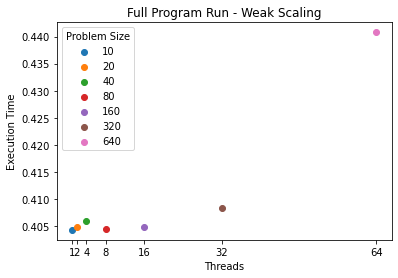

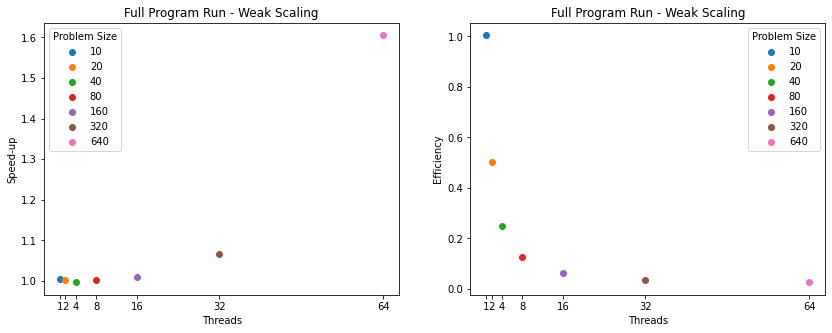

In [7]:
# plot results

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(figsize=(6,4))
for i in range(len(threads2)):
    ax.scatter(threads2[i],time_parallel2[i],label=problemsize2[i])
ax.set_xticks(threads2)
ax.set_xticklabels(threads2)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Threads')
ax.set_title('Full Program Run - Weak Scaling')
ax.legend(title="Problem Size")

fig,ax = plt.subplots(1,2,figsize=(14,5))
for i in range(len(threads2)):
    ax[0].scatter(threads2[i],speedup2[i],label=problemsize2[i])
ax[0].set_xticks(threads2)
ax[0].set_xticklabels(threads2)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Full Program Run - Weak Scaling')
ax[0].legend(title="Problem Size")

for i in range(len(threads2)):
    ax[1].scatter(threads2[i],efficiency2[i],label=problemsize2[i])
ax[1].set_xticks(threads2)
ax[1].set_xticklabels(threads2)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Threads')
ax[1].set_title('Full Program Run - Weak Scaling');
ax[1].legend(title="Problem Size");